<ipython-input-1-4c9a16131a22>:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
<ipython-input-1-4c9a16131a22>:24: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')  # Convert numeric columns to appropriate data types


Available Columns: Index(['Rk', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Awards'],
      dtype='object')


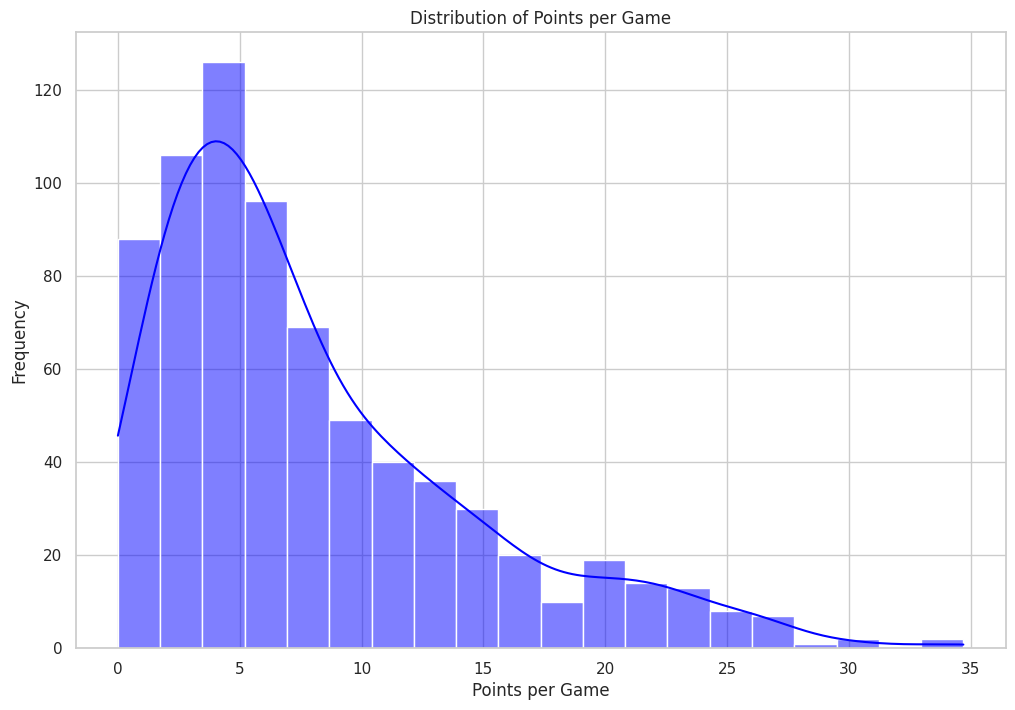

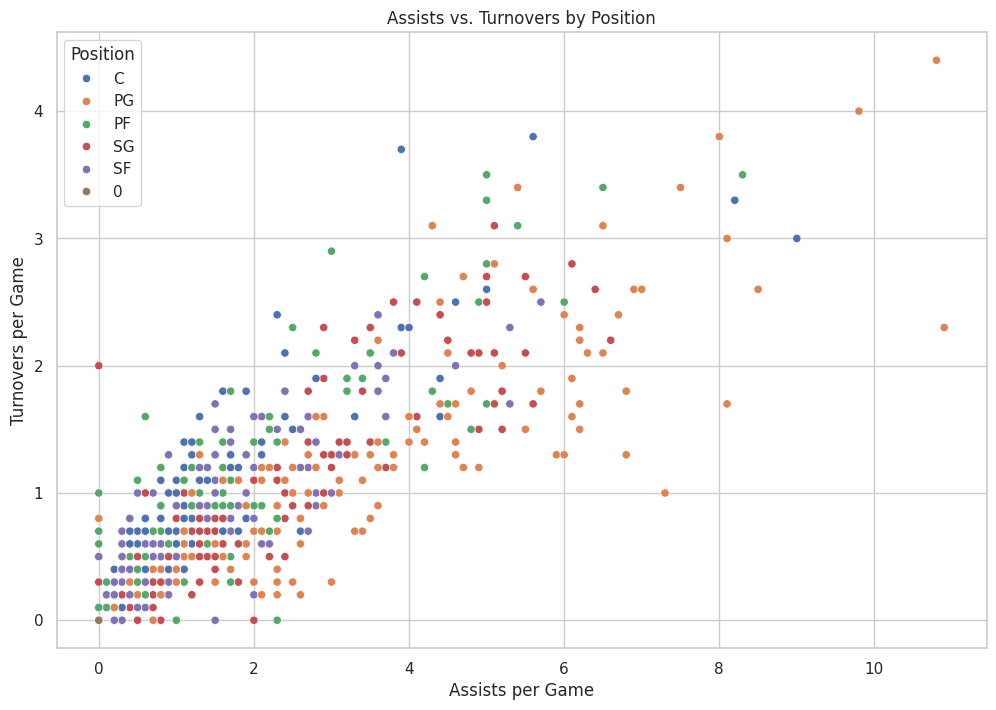

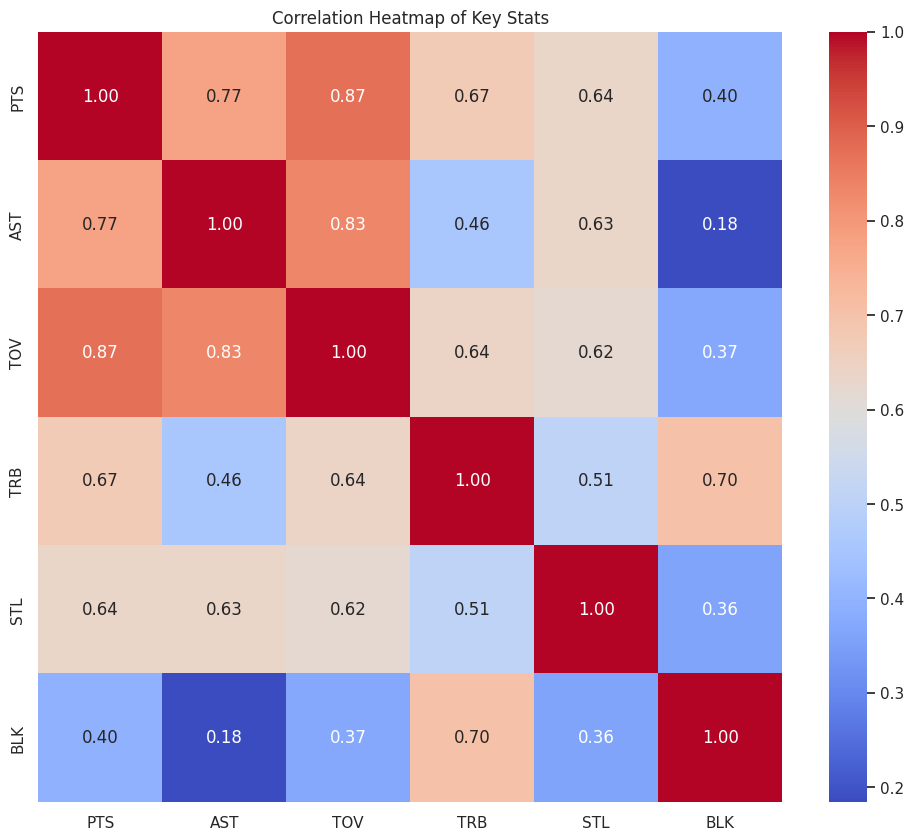

<ipython-input-1-4c9a16131a22>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_scorers, x='PTS', y='Player', palette='viridis')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 135 (\x87) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


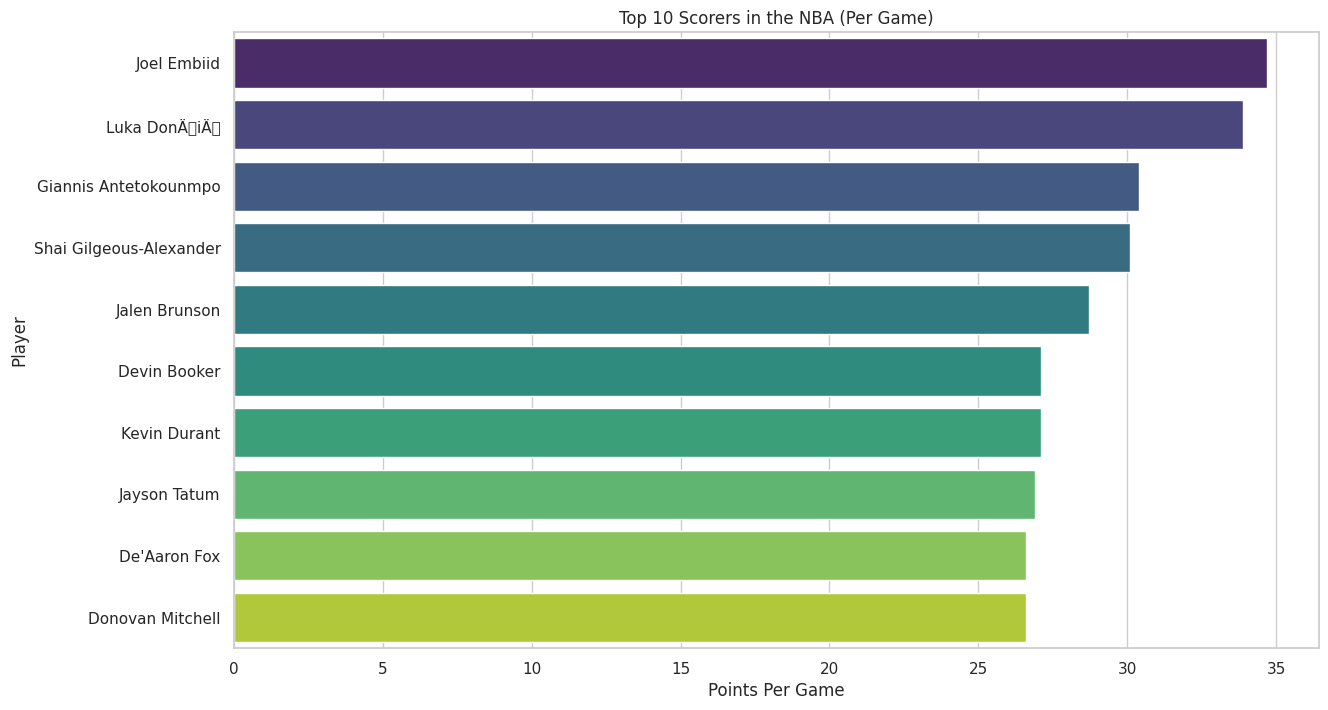

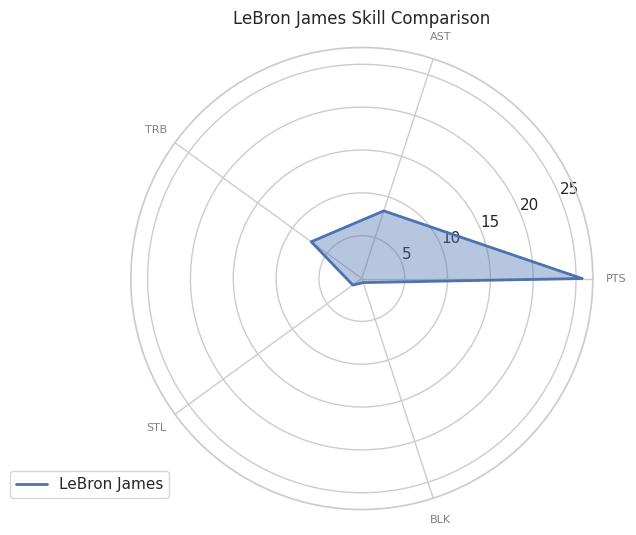

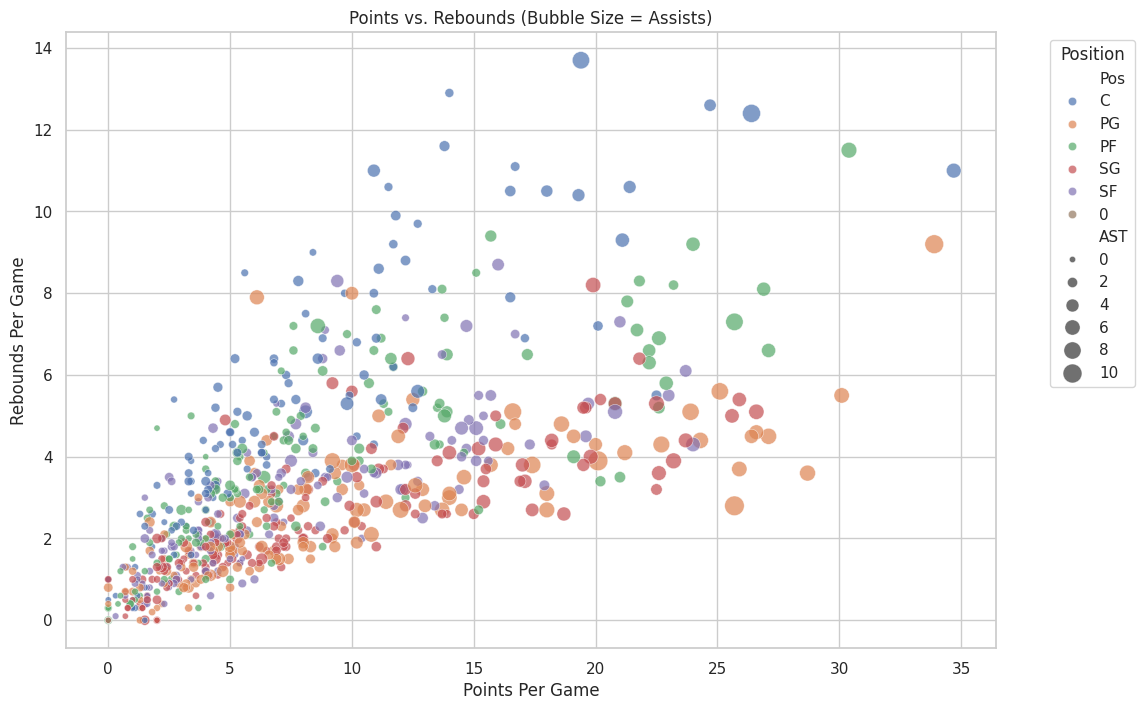

<ipython-input-1-4c9a16131a22>:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Pos', y='PTS', palette='Set2')


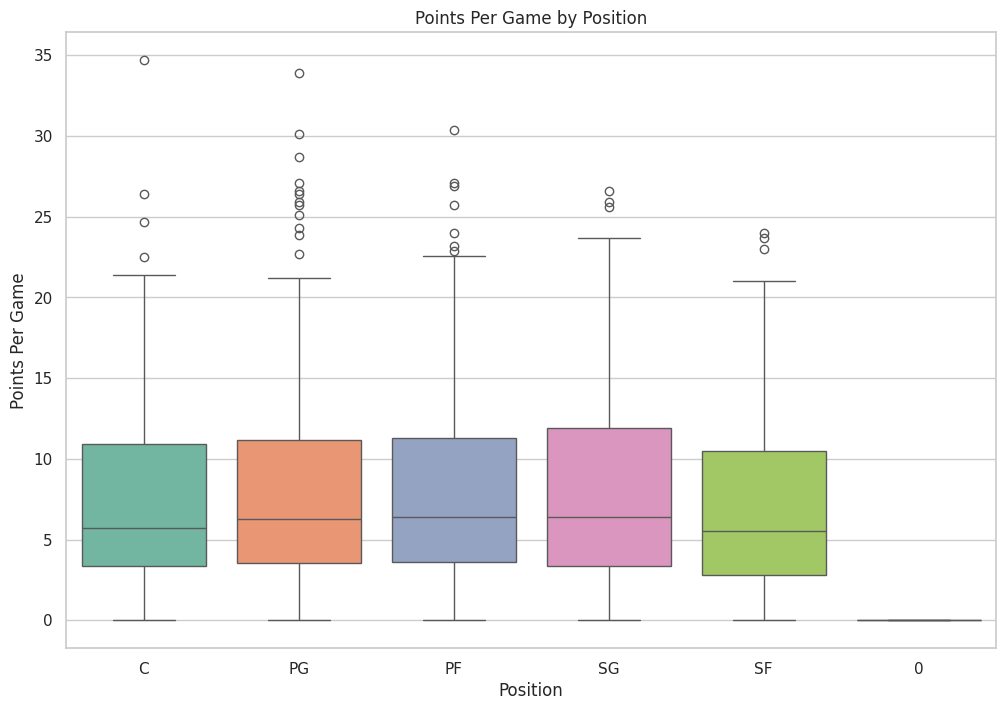

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

# Step 1: Fetch the webpage content
url = 'https://www.basketball-reference.com/leagues/NBA_2024_per_game.html'
response = requests.get(url)
response.raise_for_status()  # Ensure the request was successful

# Step 2: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table', {'id': 'per_game_stats'})

# Step 3: Read the table into a Pandas DataFrame
df = pd.read_html(str(table))[0]

# Step 4: Clean the DataFrame
df = df.dropna(subset=['Player'])  # Remove rows where 'Player' is NaN
df = df[df['Player'] != 'Player']  # Remove header rows that are repeated within the table
df = df.fillna(0)  # Fill NaN values with 0
df = df.apply(pd.to_numeric, errors='ignore')  # Convert numeric columns to appropriate data types

# Step 5: Print column names to verify
print("Available Columns:", df.columns)

# Step 6: Corrected column selection based on actual DataFrame
columns_to_plot = ['PTS', 'AST', 'TOV', 'TRB', 'STL', 'BLK']  # Replace 'REB' with 'TRB'

# Check if all required columns exist
existing_columns = [col for col in columns_to_plot if col in df.columns]
if len(existing_columns) < len(columns_to_plot):
    print(f"Some columns are missing: {[col for col in columns_to_plot if col not in df.columns]}")

# Step 7: Set up plotting aesthetics
sns.set(style='whitegrid')

# Plot 1: Points per Game Distribution
plt.figure(figsize=(12, 8))
sns.histplot(df['PTS'], bins=20, kde=True, color='blue')
plt.title('Distribution of Points per Game')
plt.xlabel('Points per Game')
plt.ylabel('Frequency')
plt.show()

# Plot 2: Assists vs. Turnovers (Scatter Plot)
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='AST', y='TOV', hue='Pos', palette='deep')
plt.title('Assists vs. Turnovers by Position')
plt.xlabel('Assists per Game')
plt.ylabel('Turnovers per Game')
plt.legend(title='Position')
plt.show()

# Plot 3: Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df[existing_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Key Stats')
plt.show()

# Plot 4: Top Scorers (Bar Plot)
top_scorers = df.nlargest(10, 'PTS')
plt.figure(figsize=(14, 8))
sns.barplot(data=top_scorers, x='PTS', y='Player', palette='viridis')
plt.title('Top 10 Scorers in the NBA (Per Game)')
plt.xlabel('Points Per Game')
plt.ylabel('Player')
plt.show()

# Plot 5: Radar Chart (Skill Comparison)
def radar_chart(data, categories, player_name):
    values = data.loc[data['Player'] == player_name, categories].values.flatten().tolist()
    if not values:
        print(f"Player {player_name} not found in the dataset.")
        return
    values += values[:1]  # Repeat the first value for a closed polygon

    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]

    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=player_name)
    ax.fill(angles, values, alpha=0.4)
    plt.title(f'{player_name} Skill Comparison')
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()

# Radar Chart for a Specific Player
categories = ['PTS', 'AST', 'TRB', 'STL', 'BLK']
radar_chart(df, categories, 'LeBron James')  # Replace with any player name in the dataset

# Plot 6: Points vs. Rebounds by Position (Bubble Plot)
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='PTS', y='TRB', size='AST', hue='Pos', sizes=(20, 200), alpha=0.7)
plt.title('Points vs. Rebounds (Bubble Size = Assists)')
plt.xlabel('Points Per Game')
plt.ylabel('Rebounds Per Game')
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot 7: Box Plot (Points by Position)
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Pos', y='PTS', palette='Set2')
plt.title('Points Per Game by Position')
plt.xlabel('Position')
plt.ylabel('Points Per Game')
plt.show()



